# Exercícios 04

- Questões do CEO:

1. Crie uma nova coluna chamada:“dormitory_type”:
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

2. Faça um gráfico de barras que represente a soma dos preços pelonúmero de quartos.

3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

7. Crie um Dashboard com os gráficos das questões 02, 03, 04( Dashboard: 1 Linha e 2 colunas )

8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

9. Crie um Dashboardcom os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

# 0.1 - IMPORTANDO AS BIBLIOTECAS 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 0.2 - IMPORTANDO OS DADOS

In [56]:
df4= pd.read_csv('./kc_house_data.csv')

In [6]:
df4.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17652,1773100620,20150505T000000,350000.0,5,3.0,2320,8400,1.0,0,0,...,7,1510,810,1963,0,98106,47.557,-122.365,1200,4800


# 1. Crie uma nova coluna chamada:“dormitory_type”:

Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


In [15]:
#criar uma nova coluna 
# fazer uma condição para atribuir os perfis

df4['dormitory_type'] = df4['bedrooms'].apply(lambda x: 'studio' if x==1 else 'apartament' if x==2 else 
                                              'house' if x>2 else 'NA')
                                            

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,house
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,house
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,apartament
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,house
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,house


# 2. Faça um gráfico de barras que represente a soma dos preços pelo números de quartos.

In [34]:
aux1 = df4[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

In [32]:
aux1.head()

,bedrooms,price
0,0,5.323550e+06
1,1,6.321093e+07
2,2,1.107789e+09
3,3,4.580264e+09
4,4,4.372957e+09


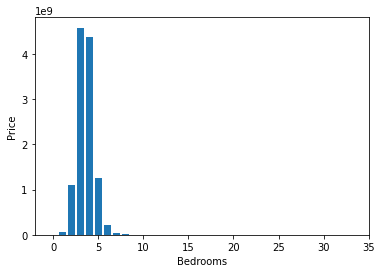

In [37]:
plt.bar(aux1['bedrooms'],aux1['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price');

# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [57]:
# transformar as datas (em datetime)
# selecionar o coluna de preços e ano de construção



aux2= df4[['price','yr_built']].groupby('yr_built').mean().reset_index()

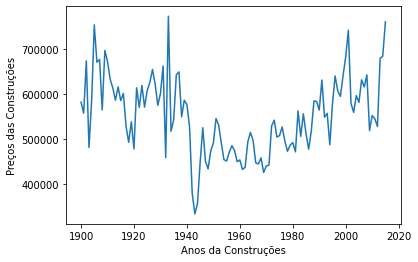

In [60]:
plt.plot(aux2['yr_built'],aux2['price'])
plt.title('Grafico de Preço médio ')
plt.xlabel('Anos da Construções')
plt.ylabel('Preços das Construções');